In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random;
from IPython.display import HTML
import time

In [2]:
def swap(arr, i, j):
    """
    Swap the ith and jth entry in the array arr.
    Assume: i != j and i, j < len(arr)
    """
    tmp = arr[i]
    arr[i] = arr[j]
    arr[j] = tmp

In [43]:
def is_ordered(arr):
    i = 0
    for i in range(len(arr) - 1):
        if arr[i] > arr[i + 1]:
            return False
    return True

In [4]:
def insertion_sort(arr):
    """
    Warning: This modifies the input array
    
    In the ith pass of the first loop, the first i elements should be
    ordered. 
    """
    for i in range(1, len(arr) - 1):
        for j in range(0, i):
            # convenience variables 
            # curr = current item being looked at
            # prev = item preceding the current item
            curr = i - j; prev = curr - 1
            if arr[prev] > arr[curr]: # prec > curr
                swap(arr, prev, curr)
            else:
                # Once prev <= curr stop this loop
                break



In [5]:
def insert(item, arr = []):
    """
    Warning: This does alter the input array.
    
    Inserts item into an already sorted array and returns the resulting array.
    This is intended to be use with stream insertion sort.
    """
    curr = len(arr)
    arr.append(item)
    while curr > 0:
        curr = curr - 1
        if arr[curr] > item:
            swap(arr, curr, curr + 1)
        else:
            break
    

A little test for the stream insertion_sort

In [7]:
arr = []

while True:
    try:
        item = input("Enter a value: ")
        if item != 'q':
            insert(int(item), arr)
        else:
            break
    except (KeyboardInterrupt, EOFError) as e:
        break
    except ValueError as e:
        print("Only numeric values are accepted.")


print(arr)


Enter a value:  3


[3]


Enter a value:  4


[3, 4]


Enter a value:  5


[3, 4, 5]


Enter a value:  1


[1, 3, 4, 5]


Enter a value:  12


[1, 3, 4, 5, 12]


Enter a value:  1


[1, 1, 3, 4, 5, 12]


Enter a value:  q


[1, 1, 3, 4, 5, 12]


In [184]:
list(map(int,a.split()))

[1, 14, 23, 13, 45, 67, 89, 2, 3, 4, 2, 1, 4, 6, 7, 8, 9, 1, 2, 7, 9, 0]

In [5]:
def selection_sort(arr):
    """
    Warning: This modifies the input array
    
    In the ith pass of the first loop, the first i elements should be
    ordered. 
    """
    for i in range(len(arr)):
        curr = i # The current location of the min in arr[i:]
        for j in range(i + 1, len(arr)):    
            if arr[j] < arr[curr]: # prec > curr
                curr = j
        swap(arr, i, curr)


In [27]:
def bubble_sort(arr):
    """
    Warning: This modifies the input array
    
    In the ith pass of the first loop, the last i elements should be
    ordered. 
    """
    arr_len = len(arr)
    swaps = True # Used for optimization
    for i in range(0, arr_len):
        if not swaps:  # As soon as there are no swaps we might as well stop
            break
        swaps = False  # If there is a swap this will get set to True
        for j in range(1, arr_len - i):
            if arr[j] < arr[j-1]:
                swaps = True
                swap(arr, j, j-1)

In [28]:
arr = random.choices(range(50), k = 20)
bubble_sort(arr)

Below is code for plotting the various sorting algorithms.

In [108]:
def gen_frame_selection(arr, gen_fig = True):
    """
    Warning: This actually modifies the input array.
    
    In the ith pass of the first loop, the first i elements should be
    ordered. 
    """
    for i in range(1, len(arr)):
        for j in range(0, i):
            # convenience variables 
            # l = curent item being looked at
            # k = item preceding the curent item
            l = i - j; k = l - 1
            if arr[k] > arr[l]: # prec > curr
                swap(arr, k, l)
                if gen_fig:
                    ax.cla()
                    yield ax.stem(arr)
                else:
                    yield 1
            else:
                # Once prev <= curr stop this loop
                break
                
def gen_frame_selection(arr, gen_fig = True):
    """
    Warning: This modifies the input array
    
    In the ith pass of the first loop, the first i elements should be
    ordered. 
    """
    for i in range(len(arr) - 1):
        curr = i # The current location of the min in arr[i:]
        for j in range(i + 1, len(arr)):    
            if arr[j] < arr[curr]: # prec > curr
                curr = j
                if gen_fig:
                    ax.cla()
                    ax.set_xlim(0,len(arr))
                    ax.set_ylim(0,50)
                    st = ax.stem(arr)
                    pt = ax.plot([curr], arr[curr], 'r.', markersize=12)
                    pt1 = ax.plot([i], arr[i], 'y.', markersize=12)
                    yield ax.lines
                else:
                    yield 1
        swap(arr, i, curr)
        if gen_fig:
            ax.cla()
            ax.set_xlim(0,len(arr))
            ax.set_ylim(0,50)
            st = ax.stem(arr)
            pt = ax.plot([curr], arr[curr], 'r.', markersize=12)
            pt1 = ax.plot([i], arr[i], 'y.', markersize=12)
            yield ax.lines


def update(frame):
    return frame

def count_frames(frames):
    return sum(1 for frame in frames) + 20


49 frames


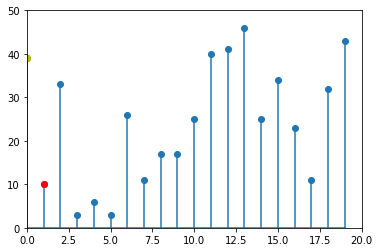

In [109]:
arr = random.choices(range(50), k = 20)

arr1 = arr[:] # Copy elements not pointer

num_frames = count_frames(gen_frame_selection(arr1, gen_fig = False))

print("%d frames"%num_frames)

#insertion_sort(arr)

fig, ax = plt.subplots()


ani = FuncAnimation(fig, update, frames = gen_frame_selection(arr), repeat=False, save_count=num_frames, interval = 400)

In [110]:
HTML(ani.to_html5_video())
#ani.save("what.mp4")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.axis([0, 10, 0, 1])

for i in range(10):
    y = np.random.random()
    plt.scatter(i, y)
    plt.pause(0.05)

plt.show()

In [28]:
arr = random.choices(range(500), k = 4000)

selection_sort(arr)

In [30]:
arr = random.choices(range(50), k = 40)

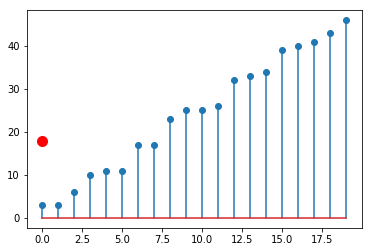

In [111]:
fig, ax = plt.subplots()
st = ax.stem(arr)
pt = ax.plot([0],[18],'ro', markersize=10)


In [6]:
def timer(f, *args, **kwargs):
    start = time.perf_counter_ns()
    f(*args, **kwargs)
    return time.perf_counter_ns() - start

In [72]:
def time_array()

In [20]:
arr = random.choices(range(500), k = 20000)
print(timer(selection_sort, arr))
arr = random.choices(range(500), k = 20000)
print(timer(insertion_sort, arr))



11789589228
32064879447


In [77]:
N = 20000
arr1 = random.choices(range(1,500), k = N)
arr2 = random.choices(range(1,500), k = N)
arr3 = [0 for i in range(N)]



def times(arr1, arr2, arr3):
    for i in range(len(arr1)):
        #arr3[i] = arr1[i] % arr2[i]
        #swap(arr1, 0, i)
        #tmp1 = arr1[i]
        arr1[i] = arr2[i]
        #arr3[i] = tmp1 * tmp2
    
(sum([timer(times,arr1, arr2, arr3) for i in range(100)])/100)/N

61.2203575

In [82]:
arr = []
arr1 = []

[arr.append(1) f]

[1]

In [142]:
f = lambda x: x+[1]

In [117]:
x = []
f(x)

[1]

In [143]:
tms = []
x = []
for i in range(10000):
    tms += [timer(f,x)]

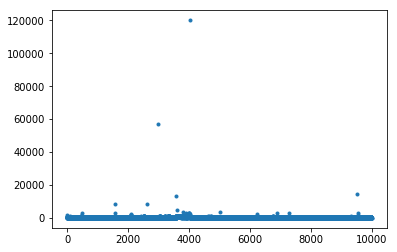

In [144]:
plt.plot(tms,'.')

In [145]:
import dis

In [162]:
def comp():
    a = []
    for i in [1,2,3,4,5]:
        a += [i]
    return a

list(dis.dis(comp))

  2           0 BUILD_LIST               0
              2 STORE_FAST               0 (a)

  3           4 SETUP_LOOP              22 (to 28)
              6 LOAD_CONST               1 ((1, 2, 3, 4, 5))
              8 GET_ITER
        >>   10 FOR_ITER                14 (to 26)
             12 STORE_FAST               1 (i)

  4          14 LOAD_FAST                0 (a)
             16 LOAD_FAST                1 (i)
             18 BUILD_LIST               1
             20 INPLACE_ADD
             22 STORE_FAST               0 (a)
             24 JUMP_ABSOLUTE           10
        >>   26 POP_BLOCK

  5     >>   28 LOAD_FAST                0 (a)
             30 RETURN_VALUE


TypeError: 'NoneType' object is not iterable

In [160]:
comp()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [48]:
def merge(arr1, arr2):
    """
    Merges two arrays arr1 and arr2 into a single output
    array. The assuption is that the two arrays are roughly 
    the same length and the algorithm is a little faster if
    len(arr1) <= len(arr2), neither of these are necessary.

    Precondition: Both input arrays are sorted. If true,
    then the ouput array will be sorted.
    """
    sorted =[]
    pos1 = 0  # current possition in array 1
    pos2 = 0  # current possition in array 2
    while(True):
        while arr1[pos1] <= arr2[pos2]:
            sorted += [arr1[pos1]]
            pos1 += 1
            if pos1 == len(arr1):
                return sorted + arr2[pos2:]
        while arr2[pos2] <= arr1[pos1] and pos2 < len(arr2):
            sorted += [arr2[pos2]]
            pos2 += 1
            if pos2 == len(arr2):
                return sorted + arr1[pos1:]
  


def merge_sort(arr):
    """
    Recursively split arr in two and merge the result
    of merge_sort on the two parts. At the very bottom
    we are merging two one-element arrays or a one element 
    and an empty array, either way the result is sorted.
    """
    if len(arr) == 1:
        return arr
    arr1 = arr[:len(arr)//2] 
    arr2 = arr[len(arr)//2:]
    return merge(merge_sort(arr1), merge_sort(arr2))

In [50]:
merge_sort([2,1,3,10,5,6,7,8,9,1])

[1, 1, 2, 3, 5, 6, 7, 8, 9, 10]

In [53]:
arr1 = random.choices(range(1,500), k = 2000)
arr3 = merge_sort(arr1)

In [47]:
is_ordered(arr3)

True